In [1]:
#using keras

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [3]:
filename = 'C:/Users/dell ap/Downloads/archive (1)/Crop_recommendation.csv'
numFeatures = 7
data = read_csv(filename)
crops = ['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']
numLabels = len(crops)

In [10]:
(data.max())

N                     140
P                     145
K                     205
temperature     43.675493
humidity        99.981876
ph               9.935091
rainfall       298.560117
label          watermelon
dtype: object

In [11]:
(data.min())

N                      0
P                      5
K                      5
temperature     8.825675
humidity        14.25804
ph              3.504752
rainfall       20.211267
label              apple
dtype: object

In [4]:
xDataset = np.array([[x[0],x[1],x[2],x[3],x[4],x[5],x[6]] for x in data.values])
yDataset = np.array([crops.index(y[7]) for y in data.values])

for i in range(numFeatures):
    xDataset.T[i]=(xDataset.T[i]-xDataset.T[i].min())/(xDataset.T[i].max()-xDataset.T[i].min())

trainIndices    = np.random.choice(len(xDataset), round(len(xDataset) * 0.9), replace = False)
testIndices     = np.array(list(set(range(len(xDataset))) - set(trainIndices)))

xTrain          = xDataset[trainIndices]
xTest           = xDataset[testIndices]
yTrain          = yDataset[trainIndices]
yTest           = yDataset[testIndices]

In [5]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1000, input_shape=(numFeatures,), activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(100, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(numLabels, activation=tf.nn.softmax)])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy','mse'])
model.fit(xTrain, yTrain, epochs=100)
model.evaluate(xTest, yTest)

Epoch 1/100
62/62 [==============================] - 1s 2ms/step - loss: 2.9058 - accuracy: 0.0965 - mse: 149.9193
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 2.3492 - accuracy: 0.2116 - mse: 149.9214
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 1.8103 - accuracy: 0.4086 - mse: 149.9245
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 1.3540 - accuracy: 0.5586 - mse: 149.9286
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.9834 - accuracy: 0.6833 - mse: 149.9335
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.7306 - accuracy: 0.7561 - mse: 149.9383
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.8030 - mse: 149.9417
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.8465 - mse: 149.9446
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4082 

[0.05481541529297829, 0.9636363387107849, 146.2457733154297]

7/7 [==============================] - 0s 1ms/step


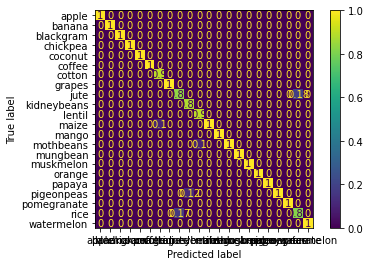

In [6]:
y_prediction = model.predict(xTest)
y_prediction = np.argmax (y_prediction, axis = 1)
#y_test=np.argmax(yTest, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(yTest, y_prediction , normalize='pred')
cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = crops)

cm_display.plot()
plt.show() 

In [7]:
print(classification_report(yTest, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        11
           6       0.90      1.00      0.95         9
           7       1.00      1.00      1.00         8
           8       0.83      0.83      0.83        12
           9       0.88      1.00      0.94        15
          10       0.90      1.00      0.95         9
          11       1.00      0.88      0.93         8
          12       1.00      1.00      1.00        11
          13       1.00      0.92      0.96        12
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00        11
          17       1.00    